# Data Analysis


Gain some insight into the dataset using Pandas, Numpy and Scikit Learn

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

DATASET_PATH = "../Eingabedaten/"
GAS_PRICES = "../Eingabedaten/Benzinpreise/"

gas_stations_with_prices_id_list = [int(os.path.splitext(os.path.basename(os.path.join(GAS_PRICES, f)))[0]) for f in os.listdir(os.path.join(GAS_PRICES)) if os.path.isfile(os.path.join(GAS_PRICES, f))]

gas_stations = pd.DataFrame()

def load_gas_station_data(data_location=DATASET_PATH):
    gas_stations = os.path.join(data_location, "Tankstellen.csv")
    return pd.read_csv(gas_stations, sep=";", names=["id", "name", "brand", "street", "house_number", "zip_code", "city", "latitude", "longitude"])


def load_historic_prices(gas_station_id, data_location=DATASET_PATH):
    path = data_location + "Benzinpreise/{}.csv".format(gas_station_id)
    historic_prices = os.path.join(path)
    return pd.read_csv(historic_prices, sep=";", header=None)

In [2]:
gas_stations = load_gas_station_data()
clean_gas_stations = gas_stations[gas_stations['id'].isin(gas_stations_with_prices_id_list)]
clean_gas_stations.reset_index()
clean_gas_stations.head()

,id,name,brand,street,house_number,zip_code,city,latitude,longitude
0,1,star Tankstelle,STAR,Listlandstrasse,16,25992,List,55.015890,8.429530
1,2,Esso Tankstelle,ESSO,TRIFT 2,,25980,WESTERLAND,54.907468,8.308741
2,3,"SYLT, TRIFT",Shell,TRIFT 7,NaN,25980,SYLT,54.904400,8.310700
3,4,DEXX-Station 188,DEXX,Dorfstr.,19,25927,Aventoft,54.901300,8.822810
5,6,Aral Tankstelle,ARAL,Keitumer Landstraße,NaN,25980,Sylt-Ost,54.900402,8.339205


In [3]:
def calculate_mean_prices(gas_stations_id_list):
    mean_prices = [load_historic_prices(x)[1].mean() for x in gas_stations_id_list]
    return mean_prices

In [4]:
means = calculate_mean_prices(sorted(gas_stations_with_prices_id_list))

In [5]:
means_df = pd.DataFrame(means, index=sorted(gas_stations_with_prices_id_list))
data = pd.concat([clean_gas_stations, means_df], axis=1)
clean_gas_stations.head()

,id,name,brand,street,house_number,zip_code,city,latitude,longitude
0,1,star Tankstelle,STAR,Listlandstrasse,16,25992,List,55.015890,8.429530
1,2,Esso Tankstelle,ESSO,TRIFT 2,,25980,WESTERLAND,54.907468,8.308741
2,3,"SYLT, TRIFT",Shell,TRIFT 7,NaN,25980,SYLT,54.904400,8.310700
3,4,DEXX-Station 188,DEXX,Dorfstr.,19,25927,Aventoft,54.901300,8.822810
5,6,Aral Tankstelle,ARAL,Keitumer Landstraße,NaN,25980,Sylt-Ost,54.900402,8.339205


Text(0,0.5,'Breitengrad')

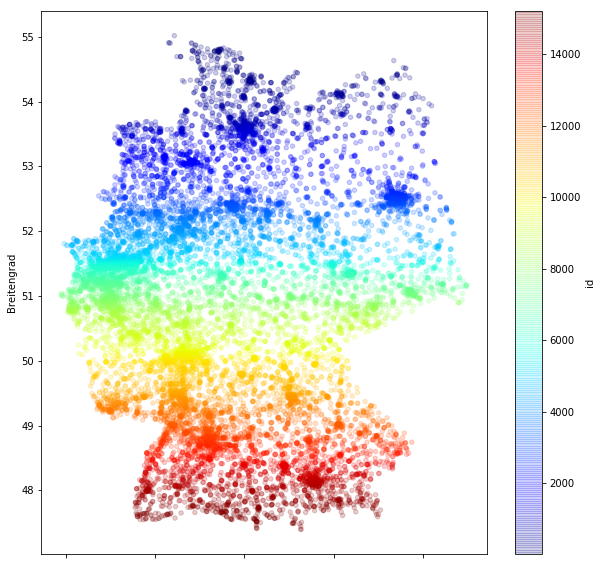

In [6]:
ax = gas_stations.plot(kind="scatter", 
                       x="longitude", 
                       y="latitude", 
                       alpha=0.2,
                       figsize=(10,10),
                       c=0,
                       cmap=plt.get_cmap("jet"),
                       colorbar=True
                      )

ax.set_xlabel("Längengrad")
ax.set_ylabel("Breitengrad")